In [1]:
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import pickle
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score


In [2]:
df = pd.read_csv(r"C:\Users\yerra\Music\Loan eligibility prediction\CODING\back end\loan.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df['Dependents']= pd.to_numeric(df['Dependents'],errors='coerce')

In [6]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,NaN,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
df.style.highlight_null(null_color='red')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.000000,Graduate,No,5849,0.000000,nan,360.000000,1.000000,Urban,Y
1,LP001003,Male,Yes,1.000000,Graduate,No,4583,1508.000000,128.000000,360.000000,1.000000,Rural,N
2,LP001005,Male,Yes,0.000000,Graduate,Yes,3000,0.000000,66.000000,360.000000,1.000000,Urban,Y
3,LP001006,Male,Yes,0.000000,Not Graduate,No,2583,2358.000000,120.000000,360.000000,1.000000,Urban,Y
4,LP001008,Male,No,0.000000,Graduate,No,6000,0.000000,141.000000,360.000000,1.000000,Urban,Y
5,LP001011,Male,Yes,2.000000,Graduate,Yes,5417,4196.000000,267.000000,360.000000,1.000000,Urban,Y
6,LP001013,Male,Yes,0.000000,Not Graduate,No,2333,1516.000000,95.000000,360.000000,1.000000,Urban,Y
7,LP001014,Male,Yes,nan,Graduate,No,3036,2504.000000,158.000000,360.000000,0.000000,Semiurban,N
8,LP001018,Male,Yes,2.000000,Graduate,No,4006,1526.000000,168.000000,360.000000,1.000000,Urban,Y
9,LP001020,Male,Yes,1.000000,Graduate,No,12841,10968.000000,349.000000,360.000000,1.000000,Semiurban,N


In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           66
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002974,Male,Yes,0.0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 439 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            439 non-null    object 
 1   Gender             439 non-null    object 
 2   Married            439 non-null    object 
 3   Dependents         439 non-null    float64
 4   Education          439 non-null    object 
 5   Self_Employed      439 non-null    object 
 6   ApplicantIncome    439 non-null    int64  
 7   CoapplicantIncome  439 non-null    float64
 8   LoanAmount         439 non-null    float64
 9   Loan_Amount_Term   439 non-null    float64
 10  Credit_History     439 non-null    float64
 11  Property_Area      439 non-null    object 
 12  Loan_Status        439 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 48.0+ KB


In [12]:
df.reset_index(inplace = True)

In [13]:
df

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,608,LP002974,Male,Yes,0.0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
435,609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
436,611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
437,612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [14]:
df = df.drop('index', axis=1)

In [15]:
# List the column names in DataFrame
df.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [16]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,LP002974,Male,Yes,0.0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
435,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
436,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
437,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


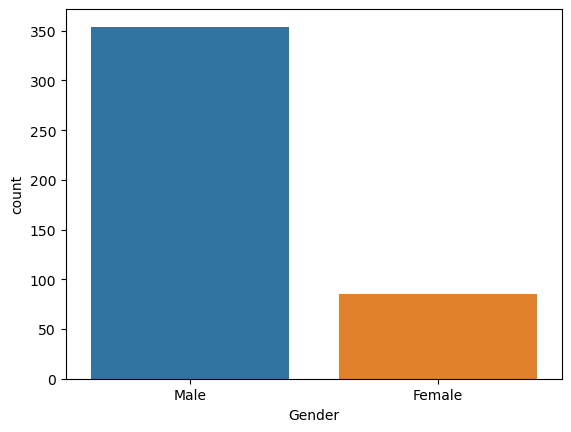

In [17]:
sns.countplot(x = df.Gender, data = df) 
plt.show()

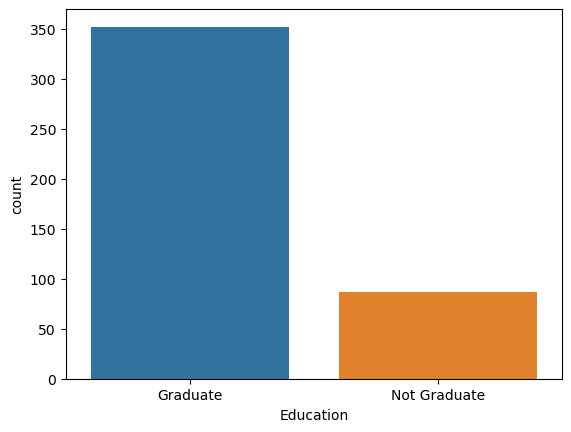

In [18]:
sns.countplot(x = df.Education, data = df) 
plt.show()

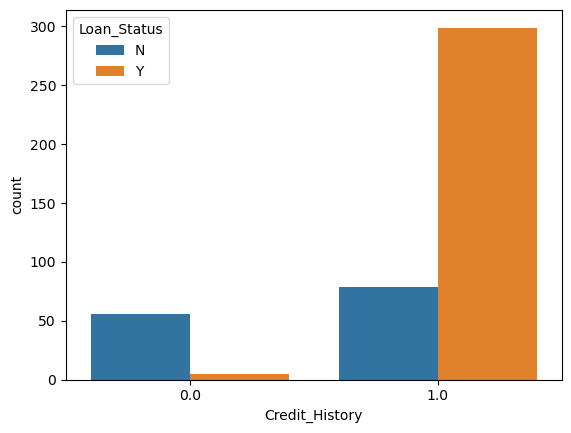

In [19]:

import seaborn as sns
import matplotlib.pyplot as plt

#Countplot for 'Credit_History' and 'Loan_Status'
sns.countplot(data=df, x='Credit_History', hue='Loan_Status')
plt.show()


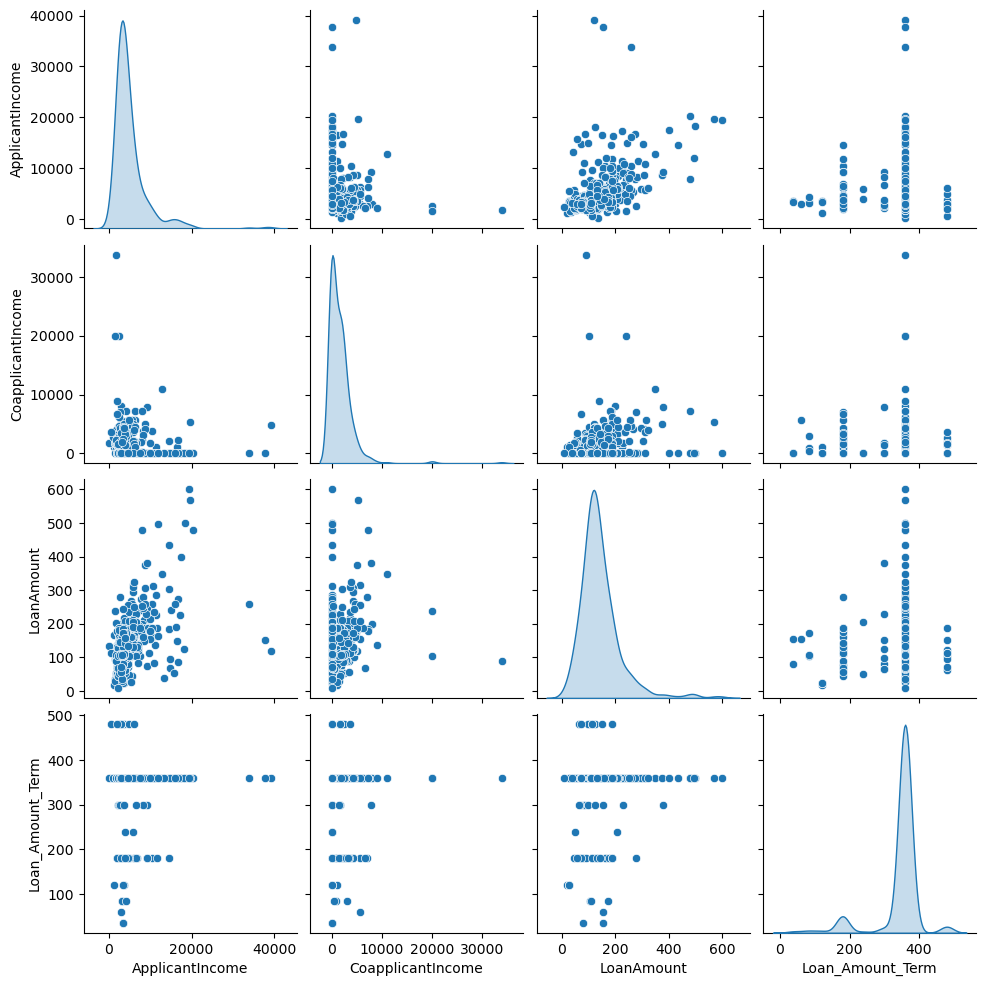

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for comparison
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Create a pairplot
sns.pairplot(df, vars=numerical_columns, diag_kind='kde')
plt.show()


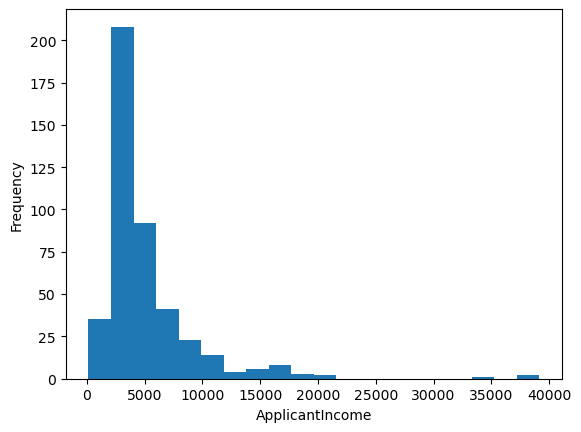

In [21]:
import matplotlib.pyplot as plt

#Histogram for 'ApplicantIncome'
plt.hist(df['ApplicantIncome'], bins=20)
plt.xlabel('ApplicantIncome')
plt.ylabel('Frequency')
plt.show()

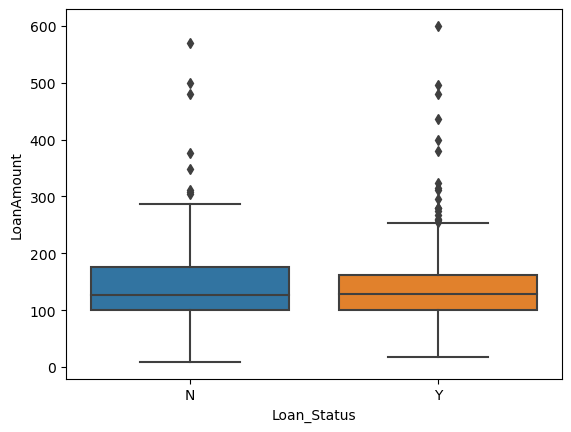

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for 'LoanAmount'
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df)
plt.show()


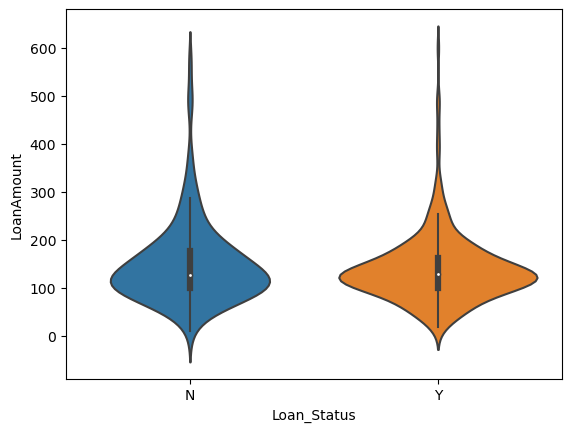

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

#Violin plot for 'LoanAmount' by 'Loan_Status'
sns.violinplot(x='Loan_Status', y='LoanAmount', data=df)
plt.show()


In [24]:
from sklearn.preprocessing import LabelEncoder
ley = LabelEncoder()

In [25]:
df = df.drop('Loan_ID', axis=1)

In [26]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
434,Male,Yes,0.0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
435,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
436,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
437,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [27]:
df['Gender'] = ley.fit_transform(df['Gender'])

In [28]:
df['Married'] = ley.fit_transform(df['Married'])

In [29]:
df['Education'] = ley.fit_transform(df['Education'])

In [30]:
df['Self_Employed'] = ley.fit_transform(df['Self_Employed'])

In [31]:
df['Property_Area'] = ley.fit_transform(df['Property_Area'])

In [32]:
df['Loan_Status'] = ley.fit_transform(df['Loan_Status'])

In [33]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,1,1,2.0,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
434,1,1,0.0,0,0,3232,1950.0,108.0,360.0,1.0,0,1
435,0,0,0.0,0,0,2900,0.0,71.0,360.0,1.0,0,1
436,1,1,1.0,0,0,8072,240.0,253.0,360.0,1.0,2,1
437,1,1,2.0,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             439 non-null    int32  
 1   Married            439 non-null    int32  
 2   Dependents         439 non-null    float64
 3   Education          439 non-null    int32  
 4   Self_Employed      439 non-null    int32  
 5   ApplicantIncome    439 non-null    int64  
 6   CoapplicantIncome  439 non-null    float64
 7   LoanAmount         439 non-null    float64
 8   Loan_Amount_Term   439 non-null    float64
 9   Credit_History     439 non-null    float64
 10  Property_Area      439 non-null    int32  
 11  Loan_Status        439 non-null    int32  
dtypes: float64(5), int32(6), int64(1)
memory usage: 31.0 KB


In [35]:
df.shape

(439, 12)

In [36]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.333892,0.184168,0.055607,-0.003151,0.014219,0.163340,0.100931,-0.084723,0.036484,0.006497,0.073219
Married,0.333892,1.000000,0.384194,-0.003548,0.012606,0.016010,0.111920,0.200131,-0.097396,0.055378,0.045668,0.124946
Dependents,0.184168,0.384194,1.000000,0.010459,0.076699,0.065388,0.017123,0.141904,-0.074614,0.022674,0.091062,0.055115
Education,0.055607,-0.003548,0.010459,1.000000,-0.017988,-0.141655,-0.064953,-0.156860,-0.093475,-0.081135,-0.058784,-0.077345
Self_Employed,-0.003151,0.012606,0.076699,-0.017988,1.000000,0.256937,0.007796,0.146457,-0.025549,-0.048053,-0.057668,-0.060529
ApplicantIncome,0.014219,0.016010,0.065388,-0.141655,0.256937,1.000000,-0.121211,0.495427,0.024264,0.045167,-0.010971,-0.023656
CoapplicantIncome,0.163340,0.111920,0.017123,-0.064953,0.007796,-0.121211,1.000000,0.176826,-0.027154,0.019623,0.008212,-0.021223
LoanAmount,0.100931,0.200131,0.141904,-0.156860,0.146457,0.495427,0.176826,1.000000,0.069169,0.020985,-0.094465,-0.059680
Loan_Amount_Term,-0.084723,-0.097396,-0.074614,-0.093475,-0.025549,0.024264,-0.027154,0.069169,1.000000,0.019323,-0.054138,-0.009306
Credit_History,0.036484,0.055378,0.022674,-0.081135,-0.048053,0.045167,0.019623,0.020985,0.019323,1.000000,0.006627,0.531467


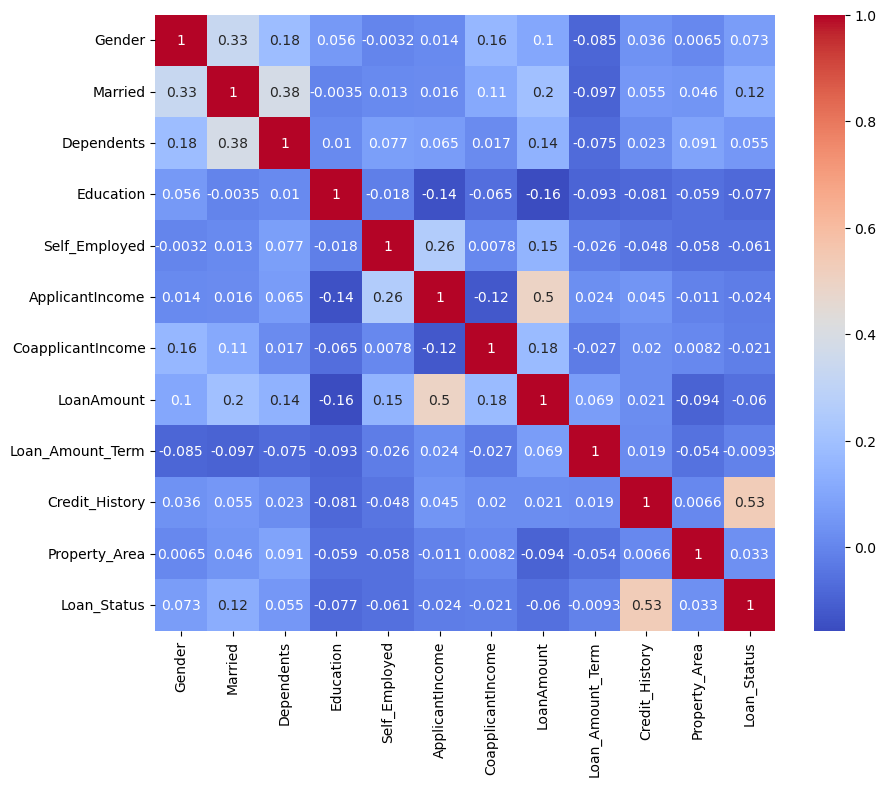

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is in a DataFrame called df
plt.figure(figsize=(10, 8)) 
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [38]:
dfmin= df[df['Loan_Status'] == 1]
dfmax= df[df['Loan_Status'] == 0]

from sklearn.utils import resample
dfminu = resample(dfmin, replace=True,  n_samples = 1000,random_state=123)
dfmaxd = resample(dfmax, replace=True,  n_samples = 1000,random_state=123)

df_dsampled = pd.concat([dfminu,dfmaxd])
df_dsampled['Loan_Status'].value_counts()

1    1000
0    1000
Name: Loan_Status, dtype: int64

In [39]:
y = df_dsampled['Loan_Status']
X = df_dsampled.drop('Loan_Status', axis = 1)

In [40]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
147,1,1,2.0,1,0,3917,0.0,124.0,360.0,1.0,1
336,1,1,1.0,0,1,3450,2079.0,162.0,360.0,1.0,1
27,1,0,0.0,1,0,3748,1668.0,110.0,360.0,1.0,1
123,1,1,0.0,0,0,5708,5625.0,187.0,360.0,1.0,1
159,1,1,2.0,0,0,4009,1717.0,116.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
227,1,0,0.0,0,0,20233,0.0,480.0,360.0,1.0,0
323,1,1,2.0,1,0,2309,1255.0,125.0,360.0,0.0,0
181,1,1,0.0,1,0,1668,3890.0,201.0,360.0,0.0,1
59,0,1,2.0,0,0,1378,1881.0,167.0,360.0,1.0,2


In [41]:
y

147    1
336    1
27     1
123    1
159    1
      ..
227    0
323    0
181    0
59     0
49     0
Name: Loan_Status, Length: 2000, dtype: int32

In [42]:
#Breaking into Train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y ,random_state=42)

In [43]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
95,1,0,0.0,0,0,14999,0.0,242.0,360.0,0.0,1
225,0,0,0.0,0,0,3762,1666.0,135.0,360.0,1.0,0
216,1,1,0.0,0,0,2383,3334.0,172.0,360.0,1.0,1
74,1,1,2.0,1,0,4288,3263.0,133.0,180.0,1.0,2
362,1,1,2.0,0,0,3510,4416.0,243.0,360.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
190,0,0,0.0,0,0,7200,0.0,120.0,360.0,1.0,0
254,1,1,1.0,0,0,3875,0.0,67.0,360.0,1.0,2
26,1,0,0.0,0,0,4166,7210.0,184.0,360.0,1.0,2
270,1,1,2.0,0,0,5391,0.0,130.0,360.0,1.0,2


In [44]:
y_train

95     0
225    1
216    1
74     1
362    1
      ..
190    1
254    0
26     1
270    1
31     1
Name: Loan_Status, Length: 1400, dtype: int32

In [45]:
y_test

143    0
23     0
238    0
77     1
335    0
      ..
371    0
221    0
281    1
424    1
169    1
Name: Loan_Status, Length: 600, dtype: int32

In [46]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
143,1,0,0.0,0,1,11000,0.0,83.0,360.0,1.0,2
23,1,0,1.0,0,1,4692,0.0,106.0,360.0,1.0,0
238,0,1,0.0,0,0,4333,2451.0,110.0,360.0,1.0,2
77,1,1,2.0,0,0,11417,1126.0,225.0,360.0,1.0,2
335,1,1,0.0,0,0,4333,2451.0,110.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
371,1,0,0.0,0,0,4683,1915.0,185.0,360.0,1.0,1
221,1,1,0.0,1,0,1800,2934.0,93.0,360.0,0.0,2
281,1,1,0.0,0,0,3033,1459.0,95.0,360.0,1.0,2
424,1,1,0.0,0,0,3859,3300.0,142.0,180.0,1.0,0


In [47]:
X_test.to_csv(r'C:\Users\yerra\Music\Loan eligibility prediction\CODING\test.csv',index=False)

In [48]:
#KNNclassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
import math
import sklearn
k = list(range(1,50,4))

train_auc = []
test_auc = []

for i in k:
    clf = sklearn.neighbors.KNeighborsClassifier(n_neighbors=i, algorithm='brute')
    clf.fit(X_train,y_train)
    prob_cv = clf.predict(X_train)


In [49]:
#Testing AUC on Test data
knn = KNeighborsClassifier(n_neighbors =3,algorithm='brute')
knn.fit(X_train,y_train)

pred_test = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, pred_test)*100

In [50]:
print("The accuracy produced by KNN is:",test_accuracy)

The accuracy produced by KNN is: 94.16666666666667


In [51]:
with open(r'C:\Users\yerra\Music\Loan eligibility prediction\CODING\front end\knn_new.pkl', 'wb') as model_file:
    pickle.dump(knn, model_file)

In [52]:
class_label = ['not eligible','eligible']
original = []
for i in y_test[:20]:
  original.append(class_label[i])

predicted = knn.predict(X_test[:20])
pred = []
for j in predicted:
  pred.append(class_label[j])

# Creating a data frame
df = pd.DataFrame(list(zip(original, pred,)),columns =[ 'original_Classlabel', 'predicted_classlabel'])
df

,original_Classlabel,predicted_classlabel
0,not eligible,eligible
1,not eligible,not eligible
2,not eligible,not eligible
3,eligible,not eligible
4,not eligible,not eligible
5,eligible,eligible
6,not eligible,not eligible
7,eligible,eligible
8,not eligible,not eligible
9,eligible,eligible


              precision    recall  f1-score   support

           0       0.92      0.97      0.94       300
           1       0.97      0.91      0.94       300

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



<Axes: >

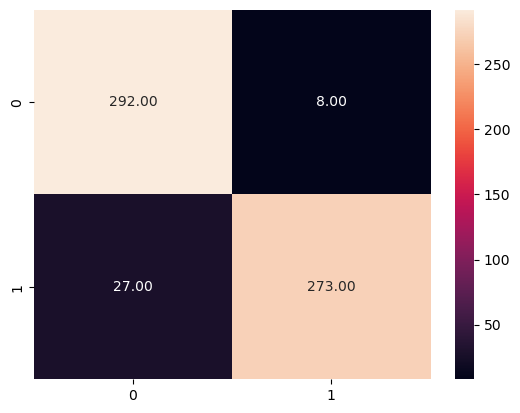

In [53]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred_test))
sns.heatmap(confusion_matrix(y_test, pred_test), annot=True, fmt='.2f')

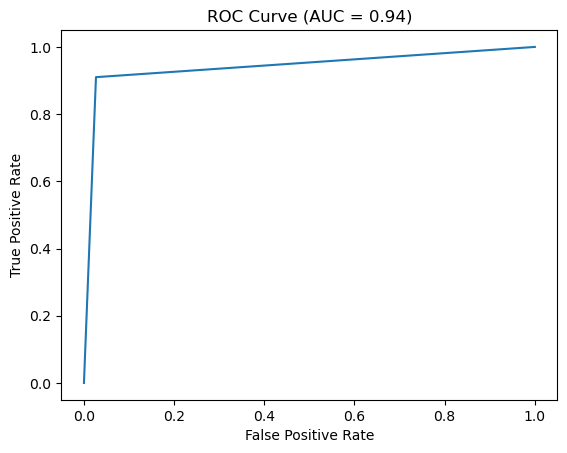

In [54]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, pred_test)
auc = roc_auc_score(y_test, pred_test)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (AUC = {auc:.2f})")
plt.show()


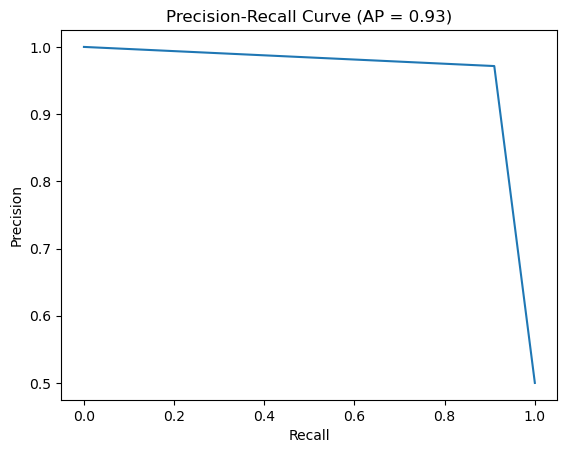

In [55]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, pred_test)
average_precision = average_precision_score(y_test, pred_test)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision-Recall Curve (AP = {average_precision:.2f})")
plt.show()

In [56]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV #used for hyperparametertuning
from sklearn.metrics import accuracy_score

dept = [5, 15, 25, 45, 150, 600, 1000]
n_estimators =  [30, 60, 90, 120, 150, 180]

param_grid={'n_estimators':n_estimators , 'max_depth':dept}
clf = RandomForestClassifier()
model = GridSearchCV(clf,param_grid,scoring='accuracy',n_jobs=-1,cv=3)
model.fit(X_train,y_train)
print("optimal n_estimators",model.best_estimator_.n_estimators)
print("optimal max_depth",model.best_estimator_.max_depth)
optimal_max_depth = model.best_estimator_.max_depth
optimal_n_estimators = model.best_estimator_.n_estimators

optimal n_estimators 150
optimal max_depth 25


In [57]:
clf = RandomForestClassifier(max_depth = optimal_max_depth,n_estimators = optimal_n_estimators)
clf.fit(X_train,y_train)
import pickle

In [58]:
y_pred=clf.predict(X_test)

In [59]:
accuracy = accuracy_score(y_test,y_pred)*100

In [60]:
print("The accuracy produced by RandomForestClassifier is:",accuracy)

The accuracy produced by RandomForestClassifier is: 99.66666666666667


In [61]:
with open(r'C:\Users\yerra\Music\Loan eligibility prediction\CODING\front end\rf_new.pkl', 'wb') as model_file:
    pickle.dump(clf, model_file)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       300
           1       1.00      0.99      1.00       300

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



<Axes: >

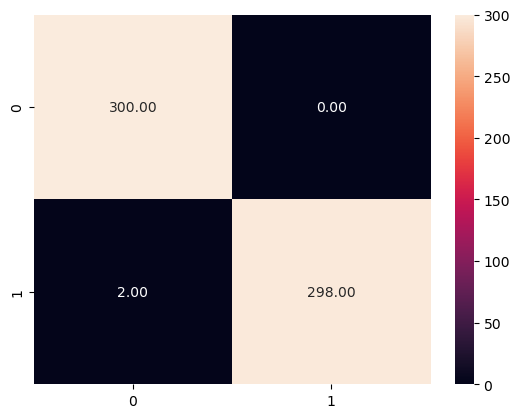

In [62]:
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.2f')

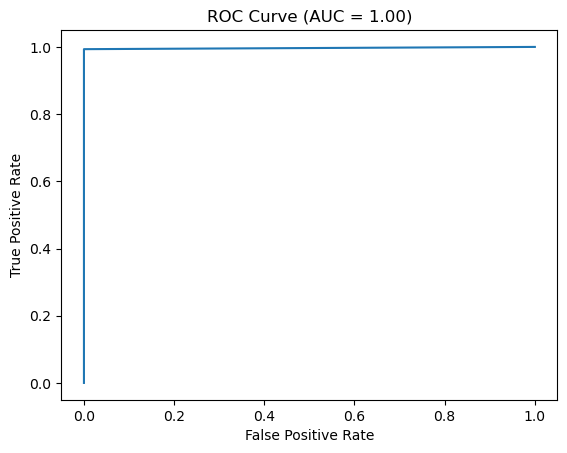

In [63]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (AUC = {auc:.2f})")
plt.show()


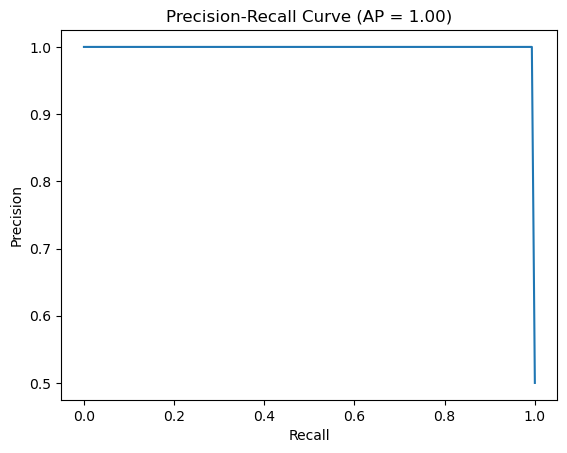

In [64]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision-Recall Curve (AP = {average_precision:.2f})")
plt.show()


In [65]:
class_label = ['not eligible','eligible']
original = []
for i in y_test[:20]:
  original.append(class_label[i])

predicted = clf.predict(X_test[:20])
pred = []
for j in predicted:
  pred.append(class_label[j])



# Creating a data frame
dt = pd.DataFrame(list(zip(original, pred,)), 
               columns =[ 'original_Classlabel', 'predicted_classlabel'])
dt

,original_Classlabel,predicted_classlabel
0,not eligible,not eligible
1,not eligible,not eligible
2,not eligible,not eligible
3,eligible,eligible
4,not eligible,not eligible
5,eligible,eligible
6,not eligible,not eligible
7,eligible,eligible
8,not eligible,not eligible
9,eligible,eligible


Accuracy on Test data is 99.33%
Accuracy on Train data is 100.00%
---------------------------


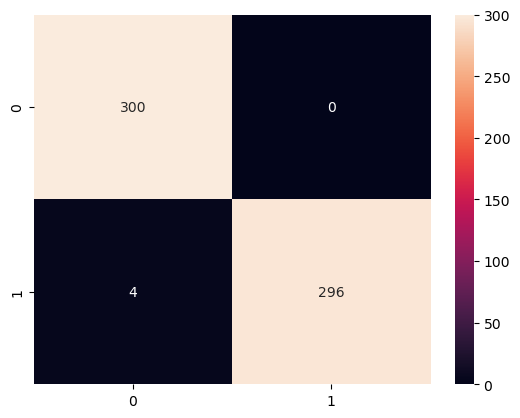

In [66]:
#XgBoost
import xgboost as xgb
from sklearn.metrics import accuracy_score

model = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.04,random_state=1)
model.fit(X_train, y_train)

import pickle
filename = r'C:\Users\yerra\Music\Loan eligibility prediction\CODING\front end\X_gb_loan.pkl'
pickle.dump(model, open(filename, 'wb'))


pred_test4 =model.predict(X_test)
test_accuracy4 = accuracy_score(y_test, pred_test4)
pred_train = model.predict(X_train)
train_accuracy4 =accuracy_score(y_train,pred_train)


print("Accuracy on Test data is {:.2%}".format(test_accuracy4))
print("Accuracy on Train data is {:.2%}".format(train_accuracy4))

print("---------------------------")
# Code for drawing seaborn heatmaps
class_names =['0','1']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test4.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [67]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [68]:
#Voting Classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
from sklearn.ensemble import GradientBoostingClassifier
# Create individual classifiers
classifier1 = DecisionTreeClassifier()
classifier2 = RandomForestClassifier()
classifier3 = GradientBoostingClassifier()

# Create a Voting Classifier
voting_classifier = VotingClassifier(estimators=[('clf1', classifier1), ('clf2', classifier2), ('clf3', classifier3)], voting='hard')

# Fitting the Voting Classifier on the training data
voting_classifier.fit(X_train, y_train)

# Predicting the test set
y_pred = voting_classifier.predict(X_test)

# Calculating and printing accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {accuracy}%')

# Calculating and printing precision
precision = precision_score(y_test, y_pred)*100
print(f'Precision: {precision}%')

# Calculating and printing F1 score
f1 = f1_score(y_test, y_pred)*100
print(f'F1 Score: {f1}%')

# Calculating and printing recall
recall = recall_score(y_test, y_pred)*100
print(f'Recall: {recall}%')


# Calculating and printing confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n {conf_matrix}')




Accuracy: 99.66666666666667%
Precision: 100.0%
F1 Score: 99.66555183946488%
Recall: 99.33333333333333%
Confusion Matrix:
 [[300   0]
 [  2 298]]


In [69]:
import pickle
filename = r'C:\Users\yerra\Music\Loan eligibility prediction\CODING\front end\voting_loan.pkl'
pickle.dump(voting_classifier, open(filename, 'wb'))
